# Exercises Pattern Recognition and Image Analysis

Hello world! I have been testing a bit of Image Analysis with Python and scikit-learn. Most of the examples are from practical class but also, there are some others that I found interesting to try. Enjoy!

Source: http://lisaserver.ulb.ac.be/documents/INFO-H-500_501/html/infoh501/labs/index.html

# LAB 1

### Car plate detection

In [1]:
# IMPORT LIBRARIES
%matplotlib inline
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, color, exposure
from skimage.io import imread
import numpy as np

from skimage import filters

# morphological operators
from skimage.morphology import disk,erosion,dilation,square

# labels
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches

import matplotlib.patches as patches

In [2]:
# import image 
image = imread('car_night.pgm')
#plt.figure(figsize=[15,10])

#display in gray scale
# plt.imshow(image, cmap=plt.cm.gray)
# plt.colorbar();

In [3]:
# separate background and foreground
threshold = filters.threshold_otsu(image)
mask = image > threshold  # mask <- binary image

# cleaning with morphological operators
size_elem = square(10)
mask = dilation(mask,selem=size_elem)
img_closing = erosion(mask,selem=size_elem)

img_closing = erosion(img_closing,selem=size_elem)
img_op = dilation(img_closing,selem=size_elem)

# using skimage . label
label_image = label(img_op, 8)

In [4]:
# getting properties from regionprops
aux = 0
regionF = 0
for region in regionprops(label_image):
    if region.eccentricity > aux :
        aux = region.eccentricity
        regionF = region
        
        
# NOW! we have the criteria for knowing which one is the PLATE :D
minr, minc, maxr, maxc = regionF.bbox
rect = patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=5)

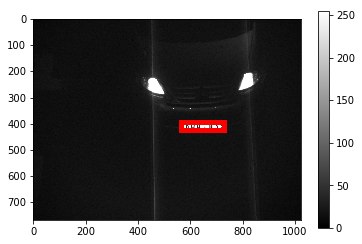

In [5]:
# print
plt.gca().add_patch(rect)
plt.imshow(image, cmap=plt.cm.gray)
plt.colorbar();

### Car detection

In [6]:
%matplotlib inline

# IMPORT LIBRARIES
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, color, exposure
from skimage.io import imread
import numpy as np

# load the image
image = imread('day1.ppm')
# plt.imshow(image, cmap=plt.cm.gray)

In [7]:
# extract Histogram of Oriented Gradients (HOG) for a given image.
# returns: HOG for the image as a 1D (flattened) array & A visualisation of the HOG image.
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(64, 64),
                    cells_per_block=(1, 1), visualise=True)

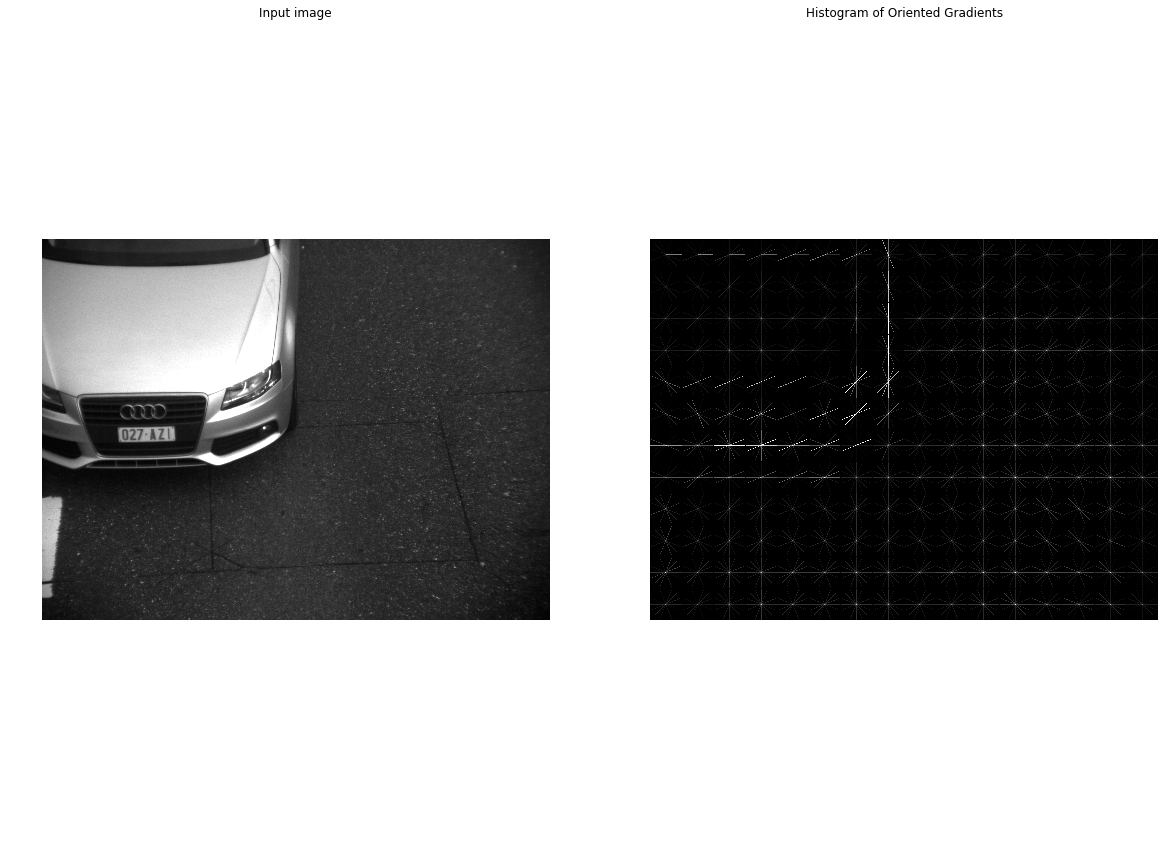

In [8]:
# set the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 7))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')
plt.show()

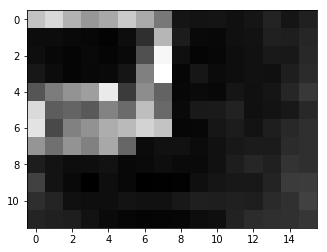

In [9]:
# reshape into new 2D matrix 
fd_res = fd.reshape(12,16,8)

# find difference between max and min from fd_res
val_diff = fd_res.max(axis=2) - fd_res.min(axis=2)
# print(val_diff)

# display the difference which gives us a pattern where to find the car
plt.imshow(val_diff, cmap=plt.cm.gray)

In [10]:
# delimite the car
# TODO

### Plate enhancement

In [11]:
%matplotlib inline

# IMPORT LIBRARIES
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, color, exposure
from skimage.io import imread
import numpy as np

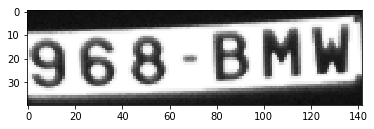

In [12]:
# load the image
image = imread('6939507.pgm')
plt.imshow(image, cmap=plt.cm.gray)

In [13]:
# TODO
# write a program that segment character from background